<a href="https://colab.research.google.com/github/Hansika2346/STML_2303A52409/blob/main/STML_ASS9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1: 1.Read the data with pandas and find features and target variables 2.Find target variable 3.Select suitable model and train 4.Find accuracy with different test sizes

In [2]:
import pandas as pd
d=pd.read_csv('/content/breast_cancer_survival.csv')
d.head()


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [3]:
target_var=d['Patient_Status']
target_var.head()

,Patient_Status
0,Alive
1,Dead
2,Alive
3,Alive
4,Alive


In [4]:
features=d.drop('Patient_Status',axis=1)
features.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19


In [5]:
d.isnull().sum()

,0
Age,0
Gender,0
Protein1,0
Protein2,0
Protein3,0
Protein4,0
Tumour_Stage,0
Histology,0
ER status,0
PR status,0


In [6]:
d.replace('FEMALE',0, inplace=True)
d.replace('MALE',1, inplace=True)
d.replace('Positive',1, inplace=True)
d.replace('Negative',0, inplace=True)
d.replace('Dead',0, inplace=True)
d.replace('Alive',1, inplace=True)

<ipython-input-6-6f4ee10337bd>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d.replace('MALE',1, inplace=True)
<ipython-input-6-6f4ee10337bd>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d.replace('Positive',1, inplace=True)
<ipython-input-6-6f4ee10337bd>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', T

In [7]:
d.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,0,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,1,1,0,Other,20-May-18,26-Aug-18,1.0
1,54,0,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,1,1,0,Other,26-Apr-18,25-Jan-19,0.0
2,63,0,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,1,1,0,Lumpectomy,24-Aug-18,08-Apr-20,1.0
3,78,0,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,1,1,0,Other,16-Nov-18,28-Jul-20,1.0
4,42,0,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,1,1,1,Lumpectomy,12-Dec-18,05-Jan-19,1.0


In [8]:
d['Surgery_type'].unique()

array(['Other', 'Lumpectomy', 'Modified Radical Mastectomy',
       'Simple Mastectomy'], dtype=object)

In [9]:
d['Histology'].unique()

array(['Infiltrating Ductal Carcinoma', 'Infiltrating Lobular Carcinoma',
       'Mucinous Carcinoma'], dtype=object)

In [10]:
d.replace('II',2, inplace=True)
d.replace('III',3, inplace=True)
d.replace('I',1, inplace=True)

<ipython-input-10-5b9ab3c124c1>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d.replace('I',1, inplace=True)


In [11]:
d.replace('Infiltrating Ductal Carcinoma',1, inplace=True)
d.replace('Infiltrating Lobular Carcinoma',2, inplace=True)
d.replace('Mucinous Carcinoma',3, inplace=True)

<ipython-input-11-60c517ca5cee>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d.replace('Mucinous Carcinoma',3, inplace=True)


In [12]:
d.replace('Other',0, inplace=True)
d.replace('Lumpectomy',1, inplace=True)
d.replace('Modified Radical Mastectomy',2, inplace=True)
d.replace('Simple Mastectomy',3, inplace=True)

<ipython-input-12-0ffc2619b2ec>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d.replace('Simple Mastectomy',3, inplace=True)


In [13]:
d.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,0,0.95256,2.15000,0.007972,-0.048340,2,1,1,1,0,0,20-May-18,26-Aug-18,1.0
1,54,0,0.00000,1.38020,-0.498030,-0.507320,2,1,1,1,0,0,26-Apr-18,25-Jan-19,0.0
2,63,0,-0.52303,1.76400,-0.370190,0.010815,2,1,1,1,0,1,24-Aug-18,08-Apr-20,1.0
3,78,0,-0.87618,0.12943,-0.370380,0.132190,1,1,1,1,0,0,16-Nov-18,28-Jul-20,1.0
4,42,0,0.22611,1.74910,-0.543970,-0.390210,2,1,1,1,1,1,12-Dec-18,05-Jan-19,1.0


In [14]:
x=d.drop(['Patient_Status','Date_of_Surgery','Date_of_Last_Visit'],axis=1)
y=d['Patient_Status']

In [15]:
x.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type
0,42,0,0.95256,2.15000,0.007972,-0.048340,2,1,1,1,0,0
1,54,0,0.00000,1.38020,-0.498030,-0.507320,2,1,1,1,0,0
2,63,0,-0.52303,1.76400,-0.370190,0.010815,2,1,1,1,0,1
3,78,0,-0.87618,0.12943,-0.370380,0.132190,1,1,1,1,0,0
4,42,0,0.22611,1.74910,-0.543970,-0.390210,2,1,1,1,1,1


In [16]:
y.count()

321

In [17]:
y.head()

,Patient_Status
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0


In [18]:
y.isnull().sum()
y.fillna(0,inplace=True)

In [19]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x,y=smote.fit_resample(x,y)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)


In [21]:
y.isnull().sum()

0

In [22]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)

SVC()

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.45098039215686275


In [24]:
print(confusion_matrix(y_test,y_pred))

[[11 41]
 [15 35]]


<Axes: >

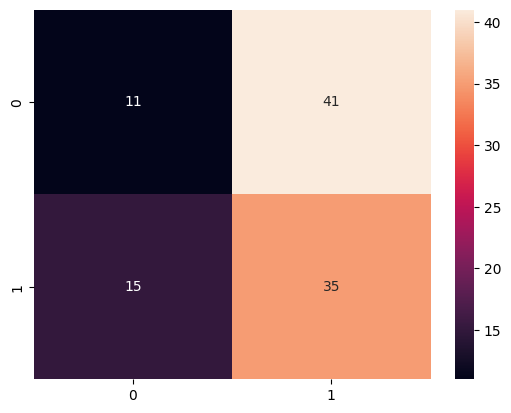

In [25]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.42      0.21      0.28        52
         1.0       0.46      0.70      0.56        50

    accuracy                           0.45       102
   macro avg       0.44      0.46      0.42       102
weighted avg       0.44      0.45      0.42       102



In [27]:
from sklearn.linear_model import LogisticRegression,Perceptron
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
yp = model.predict(x_test)
print(accuracy_score(y_test,yp))

0.6568627450980392


In [29]:
print(confusion_matrix(y_test,yp))


[[31 21]
 [14 36]]


<Axes: >

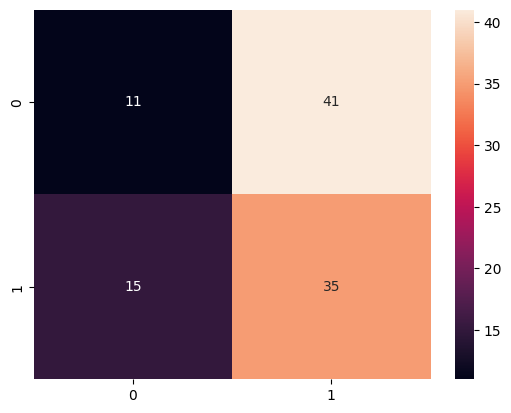

In [30]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [31]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

         0.0       0.69      0.60      0.64        52
         1.0       0.63      0.72      0.67        50

    accuracy                           0.66       102
   macro avg       0.66      0.66      0.66       102
weighted avg       0.66      0.66      0.66       102



In [32]:
pm= Perceptron()
pm.fit(x_train,y_train)

Perceptron()

In [33]:
yp = pm.predict(x_test)
print(accuracy_score(y_test,yp))

0.49019607843137253


In [34]:
print(confusion_matrix(y_test,yp))

[[ 0 52]
 [ 0 50]]


<Axes: >

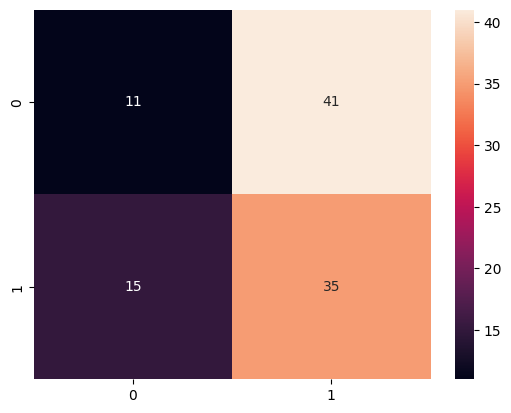

In [35]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [36]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        52
         1.0       0.49      1.00      0.66        50

    accuracy                           0.49       102
   macro avg       0.25      0.50      0.33       102
weighted avg       0.24      0.49      0.32       102



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
